In [49]:
import json
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
#viz
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
from sklearn.feature_extraction.text import CountVectorizer
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 


# Lets import the dataset

In [38]:
# read file
with open('train.json', 'r') as myfile:
    data=myfile.read()

    # parse file
obj = json.loads(data)
df = pd.DataFrame(obj)

## General discriptive data statistics

In [39]:
df.head()

,claim,claimant,date,id,label,related_articles
0,A line from George Orwell's novel 1984 predict...,,2017-07-17,0,0,"[122094, 122580, 130685, 134765]"
1,Maine legislature candidate Leslie Gibson insu...,,2018-03-17,1,2,"[106868, 127320, 128060]"
2,A 17-year-old girl named Alyssa Carson is bein...,,2018-07-18,4,1,"[132130, 132132, 149722]"
3,In 1988 author Roald Dahl penned an open lette...,,2019-02-04,5,2,"[123254, 123418, 127464]"
4,"When it comes to fighting terrorism, ""Another ...",Hillary Clinton,2016-03-22,6,2,"[41099, 89899, 72543, 82644, 95344, 88361]"


In [40]:
df['claim'][0]

"A line from George Orwell's novel 1984 predicts the power of smartphones."

In [41]:
df['claim'][200]

' Said Rep. Wilson took credit for getting funding for an FBI building. '

In [42]:
lens = df.claim.str.len()
lens.mean(), lens.std(), lens.max()

(144.51996142719383, 232.22765936789344, 8562)

### Check if there is NaN values

In [43]:
df["claim"].isnull().sum()

0

### replace missing claimant with other

In [44]:
#replace missing with others first
df["claimant"] = np.where(df["claimant"]=="","other",df["claimant"])

### make date features

In [45]:
df["date"]= pd.to_datetime(df["date"])
df['month'] = df["date"].dt.month
df['day'] = df["date"].dt.day
df['year'] = df["date"].dt.year
df['quarter'] = df["date"].dt.quarter
df['dayofweek'] = df["date"].dt.dayofweek #Monday = 0 & Sunday = 6
df['dayofweek_name'] = df["date"].dt.weekday_name
df['is_weekend'] = np.where(df["dayofweek_name"].isin(['Sunday','Saturday']),1,0)

In [46]:
election_year =  np.arange(1984, 2024, 4)
election_year = pd.DataFrame(election_year,columns = ['year'])
# election_year.head()
before_e_year =  np.arange(1983, 2023, 4)
before_e_year = pd.DataFrame(before_e_year,columns = ['before_e_year'])
# before_e_year.head()
after_e_year =  np.arange(1985, 2025, 4)
after_e_year = pd.DataFrame(after_e_year,columns = ['after_e_year'])
# after_e_year.head()
#get election year in dataset
df['e_year'] = df['year'].isin(election_year['year'])
df['b_year'] = df['year'].isin(before_e_year['before_e_year'])
df['a_year'] = df['year'].isin(after_e_year['after_e_year'])

In [47]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df['e_year_code'] = lb_make.fit_transform(df['e_year'])
df['b_year_code'] = lb_make.fit_transform(df['b_year'])
df['a_year_code'] = lb_make.fit_transform(df['a_year'])
df.drop(['dayofweek_name', 'e_year','b_year','a_year','date','related_articles','id','day'], axis=1,inplace = True)

In [48]:
# quarter 
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
df_final = pd.DataFrame(enc.fit_transform(df[['quarter']]).todense())
df_final = df_final.rename(columns = {0:'quarter_1',1:'quarter_2',2:'quarter_3',3:'quarter_4'})
df_final = pd.concat([df,df_final],axis=1, sort=False)
df_final.drop(columns=['quarter'],inplace = True)

In [50]:
# year
enc = OneHotEncoder(handle_unknown='ignore')
df_temp = pd.DataFrame(enc.fit_transform(df[['year']]).todense())
df_temp.columns = enc.categories_

pca = PCA(n_components=2)
df_temp = pd.DataFrame(pca.fit_transform(df_temp))
df_temp.columns = ['year_pca1','year_pca2']
df_final = pd.concat([df_final,df_temp],axis=1, sort=False)
df_final.drop(columns=['year'],inplace = True)

In [51]:
# month
enc = OneHotEncoder(handle_unknown='ignore')
df_temp = pd.DataFrame(enc.fit_transform(df[['month']]).todense())
df_temp.columns = enc.categories_

pca = PCA(n_components=2)
df_temp = pd.DataFrame(pca.fit_transform(df_temp))
df_temp.columns = ['month_pca1','month_pca2']
df_final = pd.concat([df_final,df_temp],axis=1, sort=False)
df_final.drop(columns=['month'],inplace = True)

In [52]:
# dayofweek
enc = OneHotEncoder(handle_unknown='ignore')
df_temp = pd.DataFrame(enc.fit_transform(df[['dayofweek']]).todense())
df_temp.columns = enc.categories_

pca = PCA(n_components=2)
df_temp = pd.DataFrame(pca.fit_transform(df_temp))
df_temp.columns = ['dayofweek_pca1','dayofweek_pca2']
df_final = pd.concat([df_final,df_temp],axis=1, sort=False)
df_final.drop(columns=['dayofweek'],inplace = True)

In [53]:
# claimant
enc = OneHotEncoder(handle_unknown='ignore')
df_temp = pd.DataFrame(enc.fit_transform(df[['claimant']]).todense())
df_temp.columns = enc.categories_

pca = PCA(n_components=2)
df_temp = pd.DataFrame(pca.fit_transform(df_temp))
df_temp.columns = ['claimant_pca1','claimant_pca2']
df_final = pd.concat([df_final,df_temp],axis=1, sort=False)
df_final.drop(columns=['claimant'],inplace = True)

In [55]:
df = df_final
df.head()

,claim,label,is_weekend,e_year_code,b_year_code,a_year_code,quarter_1,quarter_2,quarter_3,quarter_4,year_pca1,year_pca2,month_pca1,month_pca2,dayofweek_pca1,dayofweek_pca2,claimant_pca1,claimant_pca2
0,A line from George Orwell's novel 1984 predict...,0,0,0,0,1,0.0,0.0,1.0,0.0,-0.516118,-0.642951,-0.102653,-0.064117,-0.655690,-0.517881,0.686005,0.034536
1,Maine legislature candidate Leslie Gibson insu...,2,1,0,0,0,1.0,0.0,0.0,0.0,0.792107,-0.114532,-0.193913,0.909518,-0.003791,0.015580,0.686005,0.034536
2,A 17-year-old girl named Alyssa Carson is bein...,1,0,0,0,0,0.0,0.0,1.0,0.0,0.792107,-0.114532,-0.102653,-0.064117,-0.069255,0.754800,0.686005,0.034536
3,In 1988 author Roald Dahl penned an open lette...,2,0,0,1,0,1.0,0.0,0.0,0.0,-0.105170,0.064843,-0.138778,-0.157190,-0.655690,-0.517881,0.686005,0.034536
4,"When it comes to fighting terrorism, ""Another ...",2,0,1,0,0,1.0,0.0,0.0,0.0,-0.310318,0.754074,-0.193913,0.909518,0.751340,-0.377219,-0.318674,-0.156655


### Check for target feature distribution

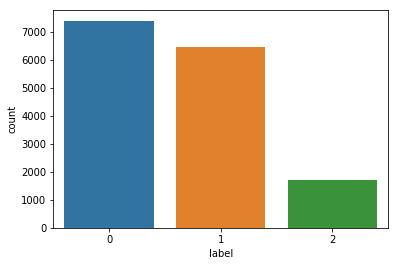

In [56]:
#plot of target
ax = sns.countplot(x="label", data=df)

In [57]:
#import nltk  <---open up when you first time install nltk
#nltk.download() <---open up when you first time install nltk
import re
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.stem.snowball import SnowballStemmer

### Create a copy of data incase

In [58]:
data = df.copy()

# start feature enginneering

## Step 0: Lets convert some numbers, remove unwanted characters

In [59]:
def normalize(text):
    """
    Given a text, cleans and normalizes it. Feel free to add your own stuff.
    """
    text = text.lower()
    # Replace ips
    text = re.sub(r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}', ' _ip_ ', text)
    # Isolate punctuation
    text = re.sub(r'([\'\"\.\(\)\!\?\-\\\/\,])', r' \1 ', text)
    # Remove some special characters
    text = re.sub(r'([\;\:\|•«\n])', ' ', text)
    # Replace numbers and symbols with language
    text = text.replace('&', ' and ')
    text = text.replace('@', ' at ')
    text = text.replace('-', '')
    text = text.replace('“', '')
    text = text.replace("'", '')  
    #text = text.replace('0', ' zero ')
    #text = text.replace('1', ' one ')
    #text = text.replace('2', ' two ')
    #text = text.replace('3', ' three ')
    #text = text.replace('4', ' four ')
    #text = text.replace('5', ' five ')
    #text = text.replace('6', ' six ')
    #text = text.replace('7', ' seven ')
    #text = text.replace('8', ' eight ')
    #text = text.replace('9', ' nine ')
    return text

In [60]:
#Remove punctuation of each observation
data['claim'] = data['claim'].apply(normalize)
data.head() #observation 0 and 4 originall had punctuation, now removed. 

,claim,label,is_weekend,e_year_code,b_year_code,a_year_code,quarter_1,quarter_2,quarter_3,quarter_4,year_pca1,year_pca2,month_pca1,month_pca2,dayofweek_pca1,dayofweek_pca2,claimant_pca1,claimant_pca2
0,a line from george orwell s novel 1984 predic...,0,0,0,0,1,0.0,0.0,1.0,0.0,-0.516118,-0.642951,-0.102653,-0.064117,-0.655690,-0.517881,0.686005,0.034536
1,maine legislature candidate leslie gibson insu...,2,1,0,0,0,1.0,0.0,0.0,0.0,0.792107,-0.114532,-0.193913,0.909518,-0.003791,0.015580,0.686005,0.034536
2,a 17 year old girl named alyssa carson is be...,1,0,0,0,0,0.0,0.0,1.0,0.0,0.792107,-0.114532,-0.102653,-0.064117,-0.069255,0.754800,0.686005,0.034536
3,in 1988 author roald dahl penned an open lette...,2,0,0,1,0,1.0,0.0,0.0,0.0,-0.105170,0.064843,-0.138778,-0.157190,-0.655690,-0.517881,0.686005,0.034536
4,"when it comes to fighting terrorism , "" anot...",2,0,1,0,0,1.0,0.0,0.0,0.0,-0.310318,0.754074,-0.193913,0.909518,0.751340,-0.377219,-0.318674,-0.156655


## 1st lets create a function to remove punctuations

In [61]:
#function to remove punctuation
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)



In [62]:
#Remove punctuation of each observation
data['claim'] = data['claim'].apply(remove_punctuation)
data.head() #observation 0 and 4 originall had punctuation, now removed. 

,claim,label,is_weekend,e_year_code,b_year_code,a_year_code,quarter_1,quarter_2,quarter_3,quarter_4,year_pca1,year_pca2,month_pca1,month_pca2,dayofweek_pca1,dayofweek_pca2,claimant_pca1,claimant_pca2
0,a line from george orwell s novel 1984 predic...,0,0,0,0,1,0.0,0.0,1.0,0.0,-0.516118,-0.642951,-0.102653,-0.064117,-0.655690,-0.517881,0.686005,0.034536
1,maine legislature candidate leslie gibson insu...,2,1,0,0,0,1.0,0.0,0.0,0.0,0.792107,-0.114532,-0.193913,0.909518,-0.003791,0.015580,0.686005,0.034536
2,a 17 year old girl named alyssa carson is be...,1,0,0,0,0,0.0,0.0,1.0,0.0,0.792107,-0.114532,-0.102653,-0.064117,-0.069255,0.754800,0.686005,0.034536
3,in 1988 author roald dahl penned an open lette...,2,0,0,1,0,1.0,0.0,0.0,0.0,-0.105170,0.064843,-0.138778,-0.157190,-0.655690,-0.517881,0.686005,0.034536
4,when it comes to fighting terrorism anothe...,2,0,1,0,0,1.0,0.0,0.0,0.0,-0.310318,0.754074,-0.193913,0.909518,0.751340,-0.377219,-0.318674,-0.156655


# 2nd lets remove stop words

In [63]:
from nltk.corpus import stopwords
# extracting the stopwords from nltk library
sw = stopwords.words('english')
sw.extend(['year', 'u', 'say', 'see', 'via','e',"n't",'would','say','we','“',"one","said"])
# displaying the stopwords
np.array(sw)

#more stop words can be added later if needed

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [64]:
#Function to remove stopwords
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [65]:
data['claim'] = data['claim'].apply(stopwords)
data.head() # as we can see stop words are removed

,claim,label,is_weekend,e_year_code,b_year_code,a_year_code,quarter_1,quarter_2,quarter_3,quarter_4,year_pca1,year_pca2,month_pca1,month_pca2,dayofweek_pca1,dayofweek_pca2,claimant_pca1,claimant_pca2
0,line george orwell novel 1984 predicts power s...,0,0,0,0,1,0.0,0.0,1.0,0.0,-0.516118,-0.642951,-0.102653,-0.064117,-0.655690,-0.517881,0.686005,0.034536
1,maine legislature candidate leslie gibson insu...,2,1,0,0,0,1.0,0.0,0.0,0.0,0.792107,-0.114532,-0.193913,0.909518,-0.003791,0.015580,0.686005,0.034536
2,17 old girl named alyssa carson trained nasa b...,1,0,0,0,0,0.0,0.0,1.0,0.0,0.792107,-0.114532,-0.102653,-0.064117,-0.069255,0.754800,0.686005,0.034536
3,1988 author roald dahl penned open letter urgi...,2,0,0,1,0,1.0,0.0,0.0,0.0,-0.105170,0.064843,-0.138778,-0.157190,-0.655690,-0.517881,0.686005,0.034536
4,comes fighting terrorism another thing know wo...,2,0,1,0,0,1.0,0.0,0.0,0.0,-0.310318,0.754074,-0.193913,0.909518,0.751340,-0.377219,-0.318674,-0.156655


## 3rd There is numerical values, lets remove that first?

In [66]:
#Function to remove numbers
def numerical(text):
    '''a function for removing the numberical'''
    # removing the stop words and lowercasing the selected words
    text = (word for word in text.split() if not word.isdigit())
    # joining the list of words with space separator
    return " ".join(text)



In [67]:
data['claim'] = data['claim'].apply(numerical)
data.head() 

,claim,label,is_weekend,e_year_code,b_year_code,a_year_code,quarter_1,quarter_2,quarter_3,quarter_4,year_pca1,year_pca2,month_pca1,month_pca2,dayofweek_pca1,dayofweek_pca2,claimant_pca1,claimant_pca2
0,line george orwell novel predicts power smartp...,0,0,0,0,1,0.0,0.0,1.0,0.0,-0.516118,-0.642951,-0.102653,-0.064117,-0.655690,-0.517881,0.686005,0.034536
1,maine legislature candidate leslie gibson insu...,2,1,0,0,0,1.0,0.0,0.0,0.0,0.792107,-0.114532,-0.193913,0.909518,-0.003791,0.015580,0.686005,0.034536
2,old girl named alyssa carson trained nasa beco...,1,0,0,0,0,0.0,0.0,1.0,0.0,0.792107,-0.114532,-0.102653,-0.064117,-0.069255,0.754800,0.686005,0.034536
3,author roald dahl penned open letter urging pa...,2,0,0,1,0,1.0,0.0,0.0,0.0,-0.105170,0.064843,-0.138778,-0.157190,-0.655690,-0.517881,0.686005,0.034536
4,comes fighting terrorism another thing know wo...,2,0,1,0,0,1.0,0.0,0.0,0.0,-0.310318,0.754074,-0.193913,0.909518,0.751340,-0.377219,-0.318674,-0.156655


#### ok we have a problem with 17yearold, because the original was 17-years-old, if punctution is removed first, then 17yearsold is one word. Even if we .split() before remove punctutation. it will not split because of "-" 
Need to deal with this later --- this was just fixed in step 0, maybe this is not nessary anymore?


## 4th Lemmatize to get base root

In [68]:
#Function to Lemmatize
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lem(text):
    '''a function for removing the numberical'''
    # removing the stop words and lowercasing the selected words
    text = [wordnet_lemmatizer.lemmatize(word) for word in text.split()]
    # joining the list of words with space separator
    return " ".join(text)

In [69]:
data['claim'] = data['claim'].apply(lem)
data.head() # well comes --> come, but predicts still predicts...hummmmmm maybe stemming it later

,claim,label,is_weekend,e_year_code,b_year_code,a_year_code,quarter_1,quarter_2,quarter_3,quarter_4,year_pca1,year_pca2,month_pca1,month_pca2,dayofweek_pca1,dayofweek_pca2,claimant_pca1,claimant_pca2
0,line george orwell novel predicts power smartp...,0,0,0,0,1,0.0,0.0,1.0,0.0,-0.516118,-0.642951,-0.102653,-0.064117,-0.655690,-0.517881,0.686005,0.034536
1,maine legislature candidate leslie gibson insu...,2,1,0,0,0,1.0,0.0,0.0,0.0,0.792107,-0.114532,-0.193913,0.909518,-0.003791,0.015580,0.686005,0.034536
2,old girl named alyssa carson trained nasa beco...,1,0,0,0,0,0.0,0.0,1.0,0.0,0.792107,-0.114532,-0.102653,-0.064117,-0.069255,0.754800,0.686005,0.034536
3,author roald dahl penned open letter urging pa...,2,0,0,1,0,1.0,0.0,0.0,0.0,-0.105170,0.064843,-0.138778,-0.157190,-0.655690,-0.517881,0.686005,0.034536
4,come fighting terrorism another thing know wor...,2,0,1,0,0,1.0,0.0,0.0,0.0,-0.310318,0.754074,-0.193913,0.909518,0.751340,-0.377219,-0.318674,-0.156655


## 5th Stemming the words

In [70]:
# create an object of stemming function, in this case i choosed snowball stemmer
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [72]:
data['claim'] = data['claim'].apply(stemming)
data.head()

,claim,label,is_weekend,e_year_code,b_year_code,a_year_code,quarter_1,quarter_2,quarter_3,quarter_4,year_pca1,year_pca2,month_pca1,month_pca2,dayofweek_pca1,dayofweek_pca2,claimant_pca1,claimant_pca2
0,line georg orwel novel predict power smartphon,0,0,0,0,1,0.0,0.0,1.0,0.0,-0.516118,-0.642951,-0.102653,-0.064117,-0.655690,-0.517881,0.686005,0.034536
1,main legislatur candid lesli gibson insult par...,2,1,0,0,0,1.0,0.0,0.0,0.0,0.792107,-0.114532,-0.193913,0.909518,-0.003791,0.015580,0.686005,0.034536
2,old girl name alyssa carson train nasa becom a...,1,0,0,0,0,0.0,0.0,1.0,0.0,0.792107,-0.114532,-0.102653,-0.064117,-0.069255,0.754800,0.686005,0.034536
3,author roald dahl pen open letter urg parent c...,2,0,0,1,0,1.0,0.0,0.0,0.0,-0.105170,0.064843,-0.138778,-0.157190,-0.655690,-0.517881,0.686005,0.034536
4,come fight terror anoth thing know work base l...,2,0,1,0,0,1.0,0.0,0.0,0.0,-0.310318,0.754074,-0.193913,0.909518,0.751340,-0.377219,-0.318674,-0.156655


In [79]:
# claim
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(data.claim).toarray()
features.shape

(15555, 6701)

In [82]:
pca = PCA(n_components=2)
df_temp = pd.DataFrame(pca.fit_transform(features))
df_temp.columns = ['claim_pca1','claim_pca2']
df_final = pd.concat([data,df_temp],axis=1, sort=False)
df_final.drop(columns=['claim'],inplace = True)
df_final.head()

,label,is_weekend,e_year_code,b_year_code,a_year_code,quarter_1,quarter_2,quarter_3,quarter_4,year_pca1,year_pca2,month_pca1,month_pca2,dayofweek_pca1,dayofweek_pca2,claimant_pca1,claimant_pca2,claim_pca1,claim_pca2
0,0,0,0,0,1,0.0,0.0,1.0,0.0,-0.516118,-0.642951,-0.102653,-0.064117,-0.655690,-0.517881,0.686005,0.034536,-0.014796,-0.003393
1,2,1,0,0,0,1.0,0.0,0.0,0.0,0.792107,-0.114532,-0.193913,0.909518,-0.003791,0.015580,0.686005,0.034536,-0.014865,0.004416
2,1,0,0,0,0,0.0,0.0,1.0,0.0,0.792107,-0.114532,-0.102653,-0.064117,-0.069255,0.754800,0.686005,0.034536,-0.022652,0.001273
3,2,0,0,1,0,1.0,0.0,0.0,0.0,-0.105170,0.064843,-0.138778,-0.157190,-0.655690,-0.517881,0.686005,0.034536,-0.019348,0.002536
4,2,0,1,0,0,1.0,0.0,0.0,0.0,-0.310318,0.754074,-0.193913,0.909518,0.751340,-0.377219,-0.318674,-0.156655,-0.024542,0.003386


In [86]:
# all features
import xgboost as xgb
from sklearn.metrics import classification_report
X_train,X_test,y_train,y_test = train_test_split(df_final.drop(['label'],axis = 1),df_final.label,random_state=1004)
model = xgb.XGBClassifier()
model.fit(X_train,y_train)
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.64      0.75      0.69      1846
           1       0.59      0.62      0.61      1645
           2       0.00      0.00      0.00       398

    accuracy                           0.62      3889
   macro avg       0.41      0.46      0.43      3889
weighted avg       0.55      0.62      0.58      3889



In [102]:
# fitting naive bayes to the training set 
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix 

#### Lets do GaussianNB

In [89]:
classifier = GaussianNB(); 
classifier.fit(X_train, y_train) 
  
# predicting test set results 
y_pred = classifier.predict(X_test) 
  
# making the confusion matrix 
cm = confusion_matrix(y_test, y_pred) 
cm 

array([[1009,  721,  116],
       [ 511, 1072,   62],
       [ 132,  237,   29]], dtype=int64)

In [99]:
def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()
    
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()
def precision_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows
def recall_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)
    return sum_of_recalls / columns
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

In [97]:
print("label precision recall")
for label in range(3):
    print(f"{label:5d} {precision(label, cm):9.3f} {recall(label, cm):6.3f}")

label precision recall
    0     0.611  0.547
    1     0.528  0.652
    2     0.140  0.073


In [98]:
print("precision total:", precision_macro_average(cm))
print("recall total:", recall_macro_average(cm))

precision total: 0.426316751497805
recall total: 0.42370775657737886


In [100]:
accuracy(cm)

0.5425559269735151

# IDEA To be tested
1. Add length of the artical (original lenght, not after preprocess)
2. add new feature - has author 1 = yes, 0 = no,
3. word2vec (classifier, log reg, rf, svm)
4. tfidf (classifier to add, log reg, rf, svm, naive bayes)
5. top model as feature
6. ensemble the models. 